<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/DS8015_Assignment_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1 (3 pts)**
Write a python function that takes the dimension (n) of a square as an input and output a corresponding shape that consists of ‘*’, which has the shape given in the figure in the assignment depending on the dimension parameter. 
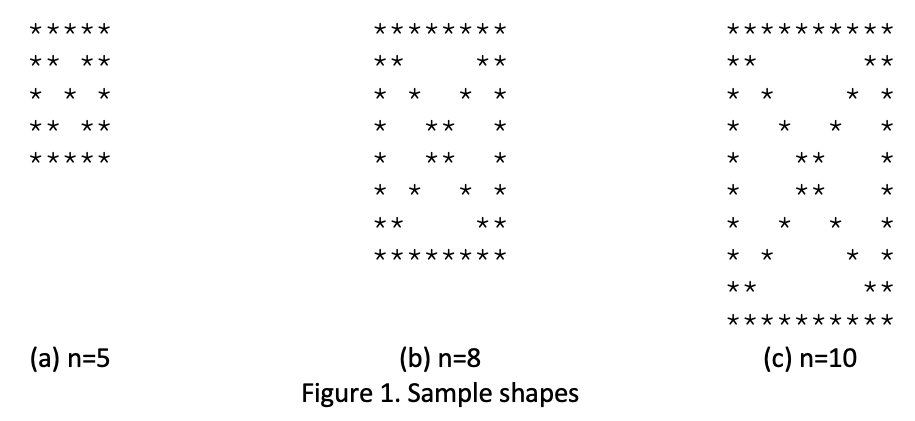


## Solution Q1:


In [97]:
print("-------------------------------------------------------------------------------")
number = int(input("Enter the dimension of square: "))
print("-------------------------------------------------------------------------------")

def squareShape(n):
  i = 1
  while(i <= n):
    j = 1
    while(j <= n):
      if(i == 1 or i == n or j == 1 or j == n or i == j or j == (n - i) + 1):
        print('* ', end = '')
      else:
        print('  ', end = '')
      j = j + 1
    print()
    i = i + 1

print("The shape of the dimension ({}) of a square is as follows:".format(number))
print("-------------------------------------------------------------------------------")
squareShape(number)
print("--------------------------------End--------------------------------------------")


-------------------------------------------------------------------------------
Enter the dimension of square: 10
-------------------------------------------------------------------------------
The shape of the dimension (10) of a square is as follows:
-------------------------------------------------------------------------------
* * * * * * * * * * 
* *             * * 
*   *         *   * 
*     *     *     * 
*       * *       * 
*       * *       * 
*     *     *     * 
*   *         *   * 
* *             * * 
* * * * * * * * * * 
--------------------------------End--------------------------------------------


# **Q2 (5 pts)**  
Solve the following questions given below by using random number generation to create sentences. The program should use four lists called article, noun, verb, and preposition from the provided lists below:

article = [‘the’, ‘a’, ‘one’, ‘some’, ‘any’]  
noun = [‘boy’, ‘girl’, ‘dog’, ‘town’, ‘car’]  
verb = [‘drove’, ‘jumped’, ‘ran’, ‘walked’, ‘skipped’]  
preposition = [‘to’, ‘from’, ‘over’, ‘under’, ‘on’]  


## **Q2.1(3 pts)**  
You will write a Python function (one or more functions) that creates **a single sentence** (as String) by selecting a word at random from each array in the following order: **article, noun, verb, preposition, article,** and **noun**. As each word is picked, it should be concatenated to the previous words. The words should be separated by spaces. When the final sentence is output, it should start with a capital letter and end with a period.

## Solution Q2.1:

In [98]:
def makeSentence(first, sencond, third, fourth, fifth, sixth):
  sentence = first.capitalize() + ' ' + sencond + ' ' + third + ' ' + fourth + ' ' + fifth + ' ' + sixth + '.'
  return sentence



Write a Python program to test your function(s) above

In [99]:
import random

article = ['the', 'a', 'one', 'some', 'any']
noun = ['boy', 'girl', 'dog', 'town', 'car']
verb = ['drove', 'jumped', 'ran', 'walked', 'skipped']
preposition = ['to', 'from', 'over', 'under', 'on']

firstWord = random.choice(article)
secondWord = random.choice(noun)
thirdWord = random.choice(verb)
fourthWord = random.choice(preposition)
fifthWord = random.choice(article)
sixthWord = random.choice(noun)

sentence = makeSentence(firstWord, secondWord, thirdWord, fourthWord, fifthWord, sixthWord)

print(sentence)



A dog skipped over some boy.


##**Q2.2 (2 pts)**  
After the above function is written and working, prepare a program to produce a short story consisting of 5 of such sentences by calling the function you have prepared in Q2.1

## Solution Q2.2:

In [100]:
story = []

for i in range(5):
  firstWord = random.choice(article)
  secondWord = random.choice(noun)
  thirdWord = random.choice(verb)
  fourthWord = random.choice(preposition)
  fifthWord = random.choice(article)
  sixthWord = random.choice(noun)
  story.append(makeSentence(firstWord, secondWord, thirdWord, fourthWord, fifthWord, sixthWord))

print(' '.join(str(x) for x in story))


A boy skipped under the town. A dog drove over a town. One girl skipped on the girl. The town jumped over a boy. Any car ran from one girl.


#**Q3 (12 pts)**  
The data file (`supermarket_sales.csv`) used in this question is downloaded from (https://www.kaggle.com/aungpyaeap/supermarket-sales). Please download the csv file from the assignment attachment because it contains some modifications done on the original file. The file is a delimited text file containing the historical record of sales data in three supermarkets. The file contains the following columns separated by the comma character `,`  

* Invoice id: Computer generated sales slip invoice identification number  
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


##**Q3.1 (3 pts)**  
Write a Python function that reads the Supermarket Sales data into a 2-dimensional structure and returns the read information to the calling program.  
**Note**: The first line of the CSV contains the column headings, therefore it should not be stored in the 2-dimensional data structure. You can skip the first line of the file.


## Solution Q3.1:

In [101]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data Science/DS-8015-Assignments/supermarket_sales.csv")

def supermarketData(data):
  result = data.rename(columns=data.iloc[0]).drop(data.index[0])
  return result


##**Q3.2 (3 pts)**  
Write a function to receive the Supermarket Sales structure (that 2-dimensional structure you’ve created in the previous question) and returns the total gross income (the sum of column `Gross Income`) of the branches **as a dictionary**

E.g. The returned information should look like (the numbers given below may not be correct):  
`{"A": 123456.123, "B": 234567.567, "C": 345678.9987}`

## Solution Q3.2:

In [102]:
def makeDictFromDataframe(data):
  result = data.groupby('Branch', as_index=False)['gross income'].sum()
  return result.set_index('Branch').to_dict()['gross income']


##**Q3.3 (3 pts)**  
Write a function to receive the Supermarket Sales list and returns an object (may be a list, or a dictionary) containing the total number of sales per Branch and per Customer Types.

The returned information can be either one of the below choices (or other)
* a dictionary like `{"A": {"Member": 230, "Normal": 351}, "B": {"Member": 123, "Normal": 117},  "C": {"Member": 335, "Normal": 18}}`
* a list like `[ [230, 351], [123, 117], [335, 18]]`

You need to consider the best structure to return since you will be displaying this information in a human readable format in the following question.

## Solution Q3.3:

In [103]:
import numpy as np

def totalNumberOfSales(data):
  results = data.groupby(['Branch','Customer type'], as_index=False)['Quantity'].sum()
  results.drop('Customer type', axis=1, inplace=True)
  results.groupby('Branch').agg(list)
  dataList = results.groupby('Branch').agg(pd.Series.tolist)
  pdToList = list(dataList['Quantity'])
  return pdToList

##**Q3.4 (3 pts)**  
Write a Python program to execute the following tasks:
* Call the function you wrote in Q3.1 to read the data file
* Call the function you wrote in Q3.2 to calculate the total gross income information and displays the information on the screen
* Call the function you wrote in Q3.3 to calculate the total number of sales per Brannch and per Customer Types and displays the information on the screen

**Note**: While displaying the information on the screen the outputs should be human readable and understandable (e.g. column headings, row names)

## Solution Q3.4:

In [104]:
print("-------------------------------------------------------------------------------")
print("A3.1: To read the data file without column headings:")
print("-------------------------------------------------------------------------------")
print(supermarketData(df))
print("-------------------------------------------------------------------------------")
print("A3.2: To calculate the total gross income and show the result as a Dictionary:")
print("-------------------------------------------------------------------------------")
print(makeDictFromDataframe(df))
print("-------------------------------------------------------------------------------")
print("A3.3: To calculate the total number of sales per Brannch and per Customer Types:")
print("-------------------------------------------------------------------------------")
print(totalNumberOfSales(df))
print("-------------------------------------------------------------------------------")


-------------------------------------------------------------------------------
A3.1: To read the data file without column headings:
-------------------------------------------------------------------------------
     750-67-8428  A     Yangon  Member  ...  522.83 4.761904762  26.1415  9.1
1    226-31-3081  C  Naypyitaw  Normal  ...   76.40    4.761905   3.8200  9.6
2    631-41-3108  A     Yangon  Normal  ...  324.31    4.761905  16.2155  7.4
3    123-19-1176  A     Yangon  Member  ...  465.76    4.761905  23.2880  8.4
4    373-73-7910  A     Yangon  Normal  ...  604.17    4.761905  30.2085  5.3
5    699-14-3026  C  Naypyitaw  Normal  ...  597.73    4.761905  29.8865  4.1
..           ... ..        ...     ...  ...     ...         ...      ...  ...
995  233-67-5758  C  Naypyitaw  Normal  ...   40.35    4.761905   2.0175  6.2
996  303-96-2227  B   Mandalay  Normal  ...  973.80    4.761905  48.6900  4.4
997  727-02-1313  A     Yangon  Member  ...   31.84    4.761905   1.5920  7.7
998  34